SEMINARIO DE SOLUCION DE PROBLEMAS DE INTELIGENCIA ARTIFICIAL I

Vázquez Pérez Ignacio David

218292866

Ingeniería en computación

## Algoritmo enjambre de particulas
Implementar y evaluar el rendimiento del algoritmo por enjambre de particulas para las siguientes funciones:

- Sphere
- Rosenbrock
- Rastrigin
- Quartic

Para cada función realizar 5 ejecuciones con 2, 4 y 8 dimensiones, cada ejecución se detendrá a las 2000 generaciones.

Se deberá graficar el comportamiento del algoritmo; para ello se deberá promediar el valor del mejor fitness de las 5 ejecuciones en la generación 0, 100, 200, ... 2000. Se deberá generar una gráfica para cada dimensión y además una gráfica en la que se incluyan las ejecuciones para 2, 4 y 8 dimensiones, es decir un total de 4 gráficas por función.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import rosen

In [4]:
def sphere(x):
    return np.sum(x**2)

def rosenbrock(x):
    return np.sum(100*(x[1:] - x[:-1]**2)**2 + (x[:-1] - 1)**2)

def rastrigin(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

def quartic(x):
    return np.sum(np.arange(1, len(x) + 1) * x**4)

In [5]:
class Particle:
    def __init__(self, dim, bounds):
        self.position = np.random.uniform(bounds[0], bounds[1], dim)
        self.velocity = np.random.uniform(-1, 1, dim)
        self.best_position = self.position
        self.best_fitness = float('inf')

class ParticleSwarmOptimization:
    def __init__(self, func, dim, bounds, num_particles=50, inertia=0.5, cognitive=0.5, social=0.5, num_runs=5, generations=2000):
        self.func = func
        self.dim = dim
        self.bounds = bounds
        self.num_particles = num_particles
        self.inertia = inertia
        self.cognitive = cognitive
        self.social = social
        self.num_runs = num_runs
        self.generations = generations
        self.function_name = func.__name__
        
    def optimize(self):
        best_fitness_per_generation = np.zeros((self.num_runs, self.generations+1))
        
        for run in range(self.num_runs):
            particles = [Particle(self.dim, self.bounds) for _ in range(self.num_particles)]
            global_best_position = None
            global_best_fitness = float('inf')
            for _ in range(self.generations):
                for particle in particles:
                    fitness = self.func(particle.position)
                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position
                    if fitness < global_best_fitness:
                        global_best_fitness = fitness
                        global_best_position = particle.position

                for particle in particles:
                    particle.velocity = self.update_velocity(particle.velocity, particle.position, particle.best_position, global_best_position)
                    particle.position = self.update_position(particle.position, particle.velocity, self.bounds)

                best_fitness_per_generation[run, _] = global_best_fitness

        avg_best_fitness = np.mean(best_fitness_per_generation, axis=0)
        return avg_best_fitness
    
    def update_velocity(self, velocity, position, best_position, global_best_position):
        cognitive_component = self.cognitive * np.random.rand(self.dim) * (best_position - position)
        social_component = self.social * np.random.rand(self.dim) * (global_best_position - position)
        new_velocity = self.inertia * velocity + cognitive_component + social_component
        return new_velocity
    
    def update_position(self, position, velocity, bounds):
        new_position = position + velocity
        new_position = np.clip(new_position, bounds[0], bounds[1])
        return new_position
    
    def plot(self):
        avg_best_fitness = self.optimize()
        plt.plot(avg_best_fitness)
        plt.title(f"PSO Performance on {self.function_name} Function ({self.dim}D)")
        plt.xlabel("Generation")
        plt.ylabel("Best Fitness")
        plt.grid(True)
        plt.show()

In [6]:
functions = [sphere, rosenbrock, rastrigin, quartic]
function_names = ['Sphere', 'Rosenbrock', 'Rastrigin', 'Quartic']
dimensions = [2, 4, 8]
num_runs = 5
generations = 2000

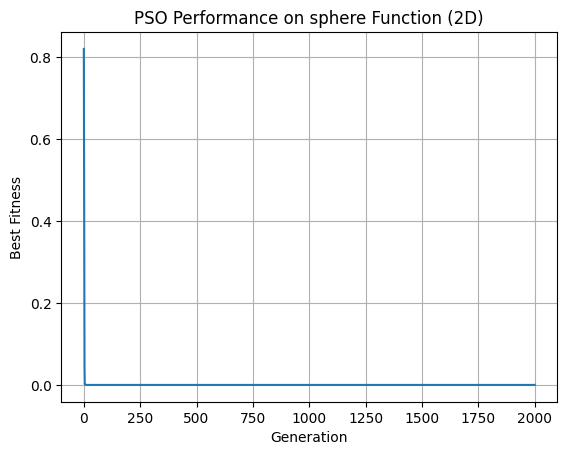

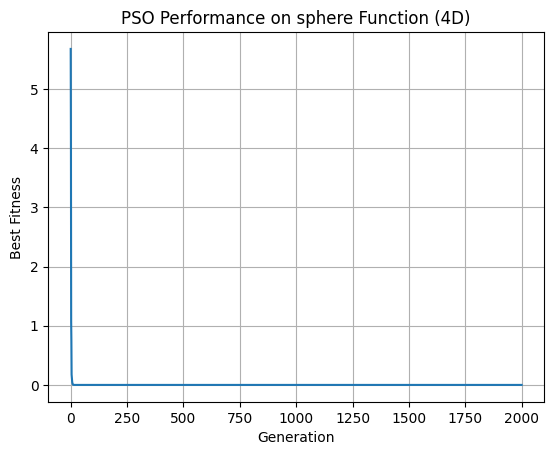

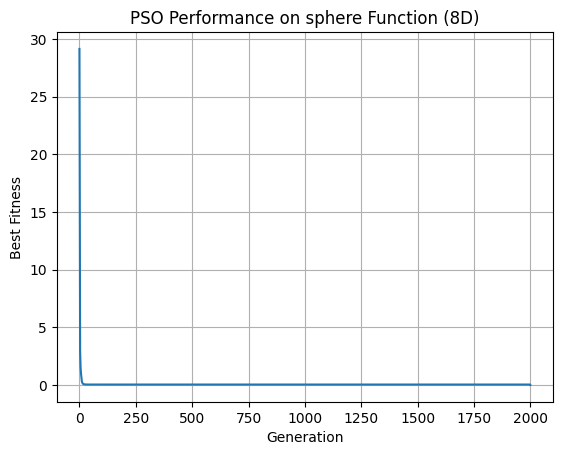

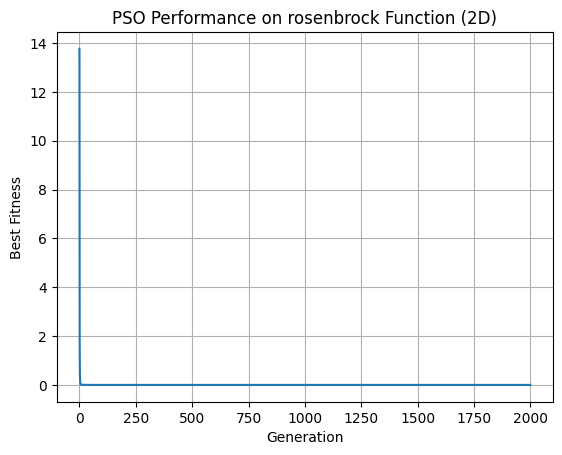

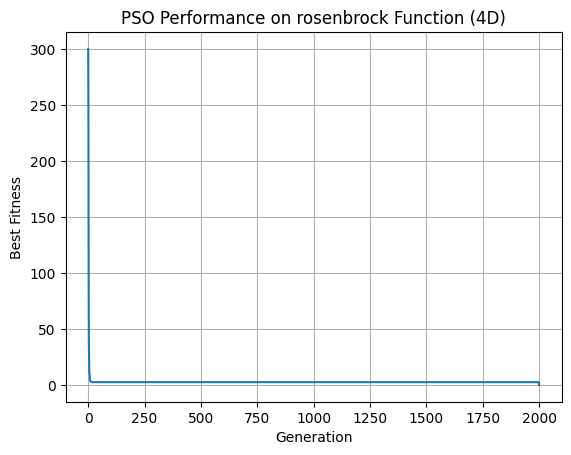

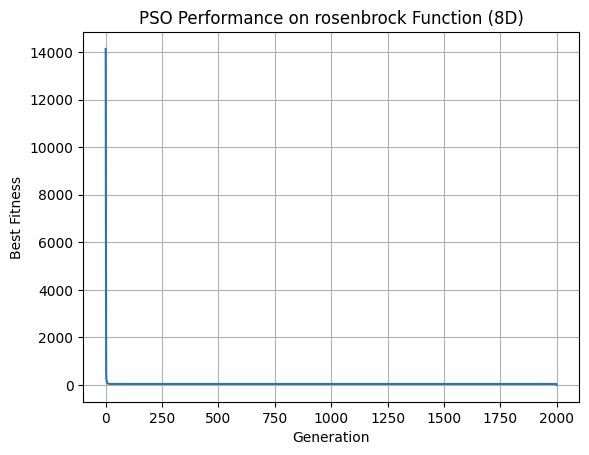

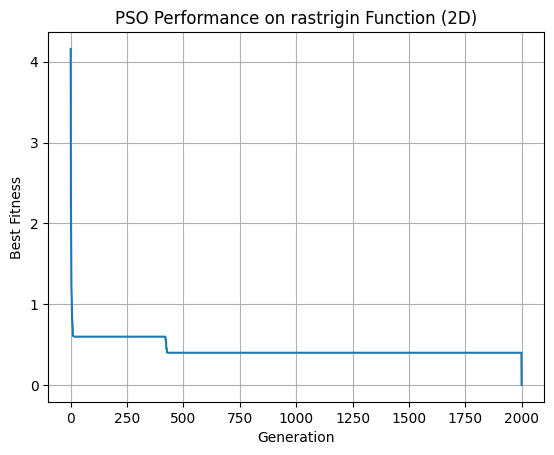

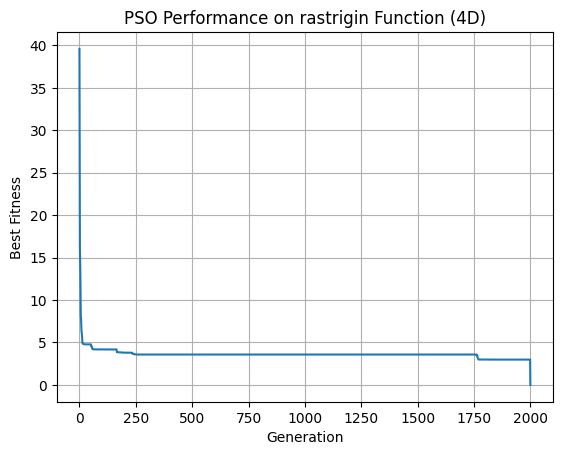

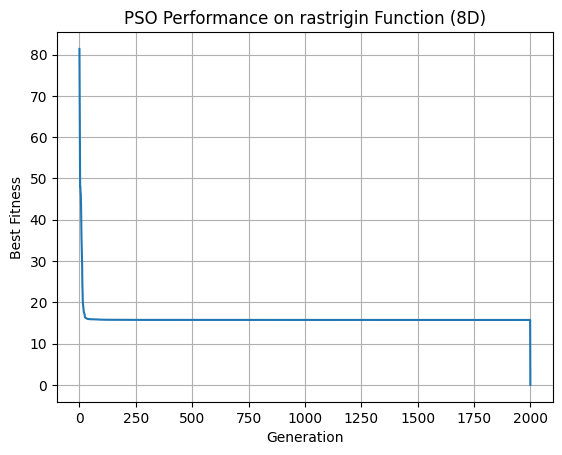

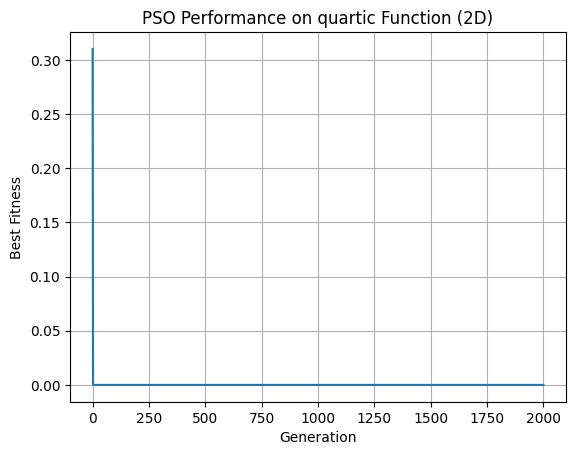

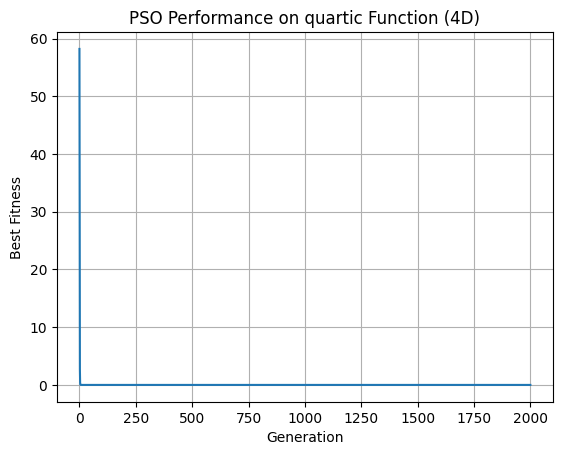

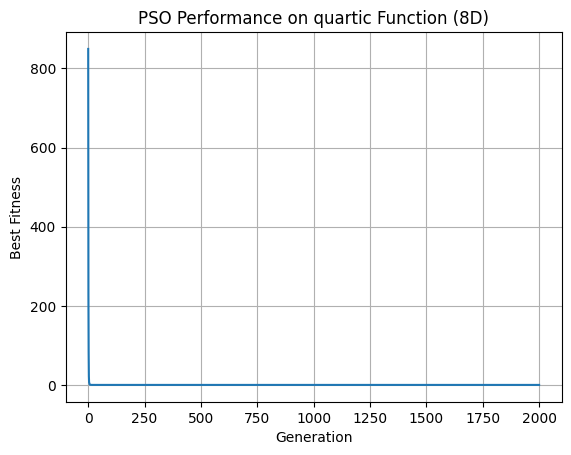

In [8]:
for func, func_name in zip(functions, function_names):
    for dim in dimensions:
        bounds = (-5.12, 5.12)
        pso_instance = ParticleSwarmOptimization(func, dim, bounds, num_runs=num_runs, generations=generations)
        pso_instance.plot()

## Conclusión


Al probar el algoritmo de enjambre de partículas en diferentes funciones, vimos que funciona bastante bien para problemas simples como calcular la suma de cuadrados o la función cuártica, sin importar la cantidad de dimensiones. Pero cuando las funciones se vuelven más complicadas, como el Rosenbrock o el Rastrigin, el algoritmo puede tardar más en encontrar la solución ideal, especialmente cuando hay más variables involucradas. También notamos que en problemas con más dimensiones, el algoritmo puede tener problemas para encontrar la mejor solución. Esto sugiere que quizás necesitemos métodos más avanzados para lidiar con problemas más difíciles. En general, estos resultados nos muestran que necesitamos tener en cuenta tanto la función que estamos tratando de optimizar como la cantidad de variables cuando elijamos un algoritmo de optimización.